# O'VN Team - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Overview
1. Data
2. Clean
3. Analysis
4. Deeply
5. Visualize on GDS


# 1. Data

- Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### What ?

- **Some values**

In [4]:
ted = pd.read_csv('ted.csv')
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


- **Shape**

In [5]:
ted.shape

(2550, 17)

- **Info**

In [6]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

- **Missing values (NaN)**

In [7]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [8]:
ted[ted['speaker_occupation'].isna()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


# 2. Clean

- **Mode**

In [9]:
ted.speaker_occupation.mode()

0    Writer
dtype: object

In [10]:
ted['speaker_occupation'] = ted.speaker_occupation.fillna(ted.speaker_occupation.mode()[0])

In [11]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

- **Describe**

In [12]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


# 3. Analysis

In [13]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


`comments`, `views`
- Top Talks : `comments`, `views`
- Top Events : `views`, `event.value_counts()`
- Top Languages : `languages.value_counts()`
- Top Occupation : `speaker_occupation`
- Top Topic : `tags`
- Top Ratings : `ratings`


_So, views correlates well with languages & comments_

- **Year**

In [14]:
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [15]:
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

In [16]:
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [17]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')
ted['published_datetime'] = pd.to_datetime(ted.published_date, unit='s')
ted[['event', 'film_datetime', 'published_datetime']].sample(5)

,event,film_datetime,published_datetime
315,TED2008,2008-02-02,2008-10-21 01:00:00
2283,TEDNYC,2016-09-07,2016-09-19 15:03:54
1292,TEDGlobal 2012,2012-06-27,2012-07-20 15:00:38
770,TEDGlobal 2010,2010-07-09,2010-09-20 08:43:00
592,TEDIndia 2009,2009-11-06,2010-01-12 08:47:00


In [18]:
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

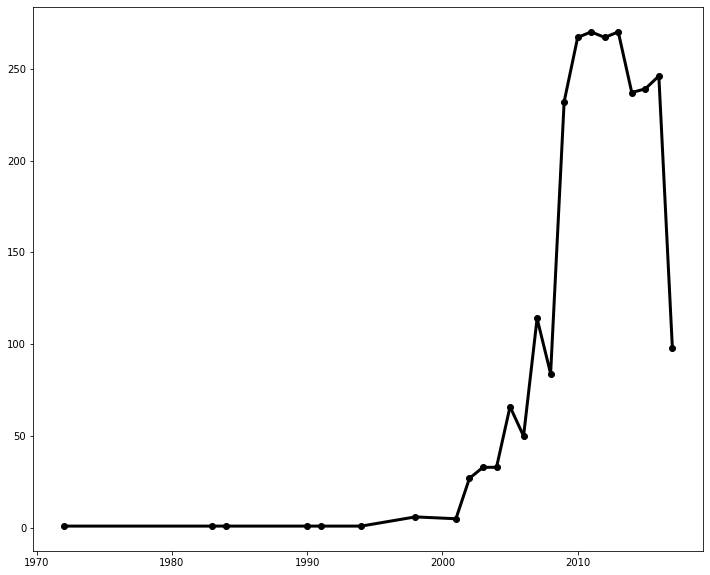

In [19]:
plt.figure(figsize=(12, 10))
ted.film_datetime.dt.year.value_counts().sort_index().plot(c='black', linewidth=3, marker='o')

In [20]:
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

- **Events**

In [21]:
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [22]:
ted.groupby('event').views.mean()

event
AORN Congress                   149818.0
Arbejdsglaede Live              971594.0
BBC TV                          521974.0
Bowery Poetry Club              676741.0
Business Innovation Factory     304086.0
                                 ...    
The Do Lectures                 112321.0
Toronto Youth Corps            1028630.0
University of California        261831.5
Web 2.0 Expo 2008               757791.0
World Science Festival         3302312.0
Name: views, Length: 355, dtype: float64

In [23]:
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [24]:
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


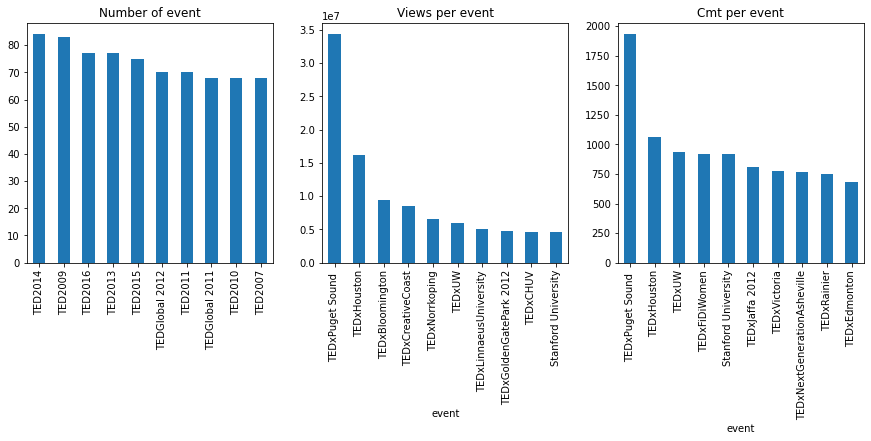

In [25]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.title('Number of event')
ted.event.value_counts()[:10].plot(kind='bar')

plt.subplot(3, 3, 2)
plt.title('Views per event')
# plt.xticks(rotation=20)
ted.groupby('event').views.mean().sort_values(ascending=False)[:10].plot(kind="bar")

plt.subplot(3, 3, 3)
plt.title('Cmt per event')
# plt.xticks(rotation=20)
ted.groupby('event').comments.mean().sort_values(ascending=False)[:10].plot(kind="bar")

# 4. Deeply

- Correlation 
- Predict 

- **Correlation**

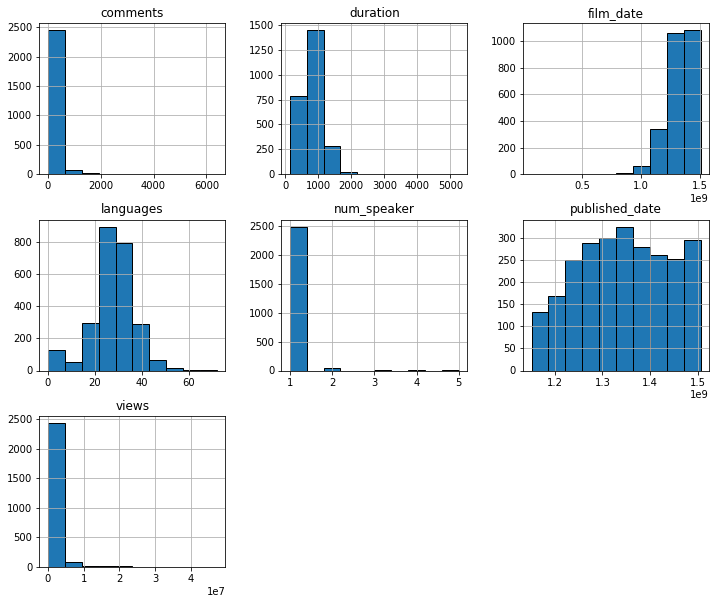

In [26]:
ted.hist(edgecolor="black", linewidth=1, figsize=(12, 10));

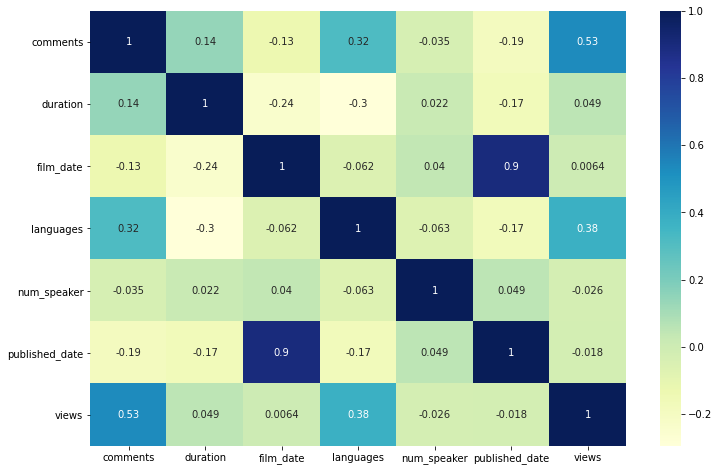

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(ted.corr(), annot=True, cmap='YlGnBu')